In [1]:
### Denoising the images
import warnings
warnings.filterwarnings("ignore")

In [17]:
###importing stuff 
### resizing resclaing cropping and flipping imaegs
### data augmentation
import skimage
import math
import matplotlib
import numpy             as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
from skimage import img_as_float
from skimage import img_as_ubyte
from skimage import util
from skimage.restoration import denoise_tv_chambolle,denoise_bilateral,denoise_wavelet,estimate_sigma
from skimage.util import random_noise
from skimage.color import rgb2gray
from skimage.transform import resize,rescale

def image_prop(image):
    print("-"*50)
    print("Type         :  ",type(image))
    print("DType        :  ",image.dtype)
    print("Shape        :  ",image.shape)
    print("size         :  ",image.size)
    print("High Pixel   :  ",image.max())
    print("Lowes Pixel  :  ",image.min())
    print("Aspect Ratio :  ",image.shape[1]/float(image.shape[0]))
    
    print("-"*50)
    
def plot_image(image):
    plt.figure(figsize=(10,10))
    if image.shape[2] == 3:    
        plt.imshow(image)
    else:
        plt.imshow(image,cmap="gray")
    plt.colorbar()
    image_prop(image)

--------------------------------------------------
Type         :   <class 'numpy.ndarray'>
DType        :   uint8
Shape        :   (2136, 3216, 3)
size         :   20608128
High Pixel   :   255
Lowes Pixel  :   0
Aspect Ratio :   1.5056179775280898
--------------------------------------------------


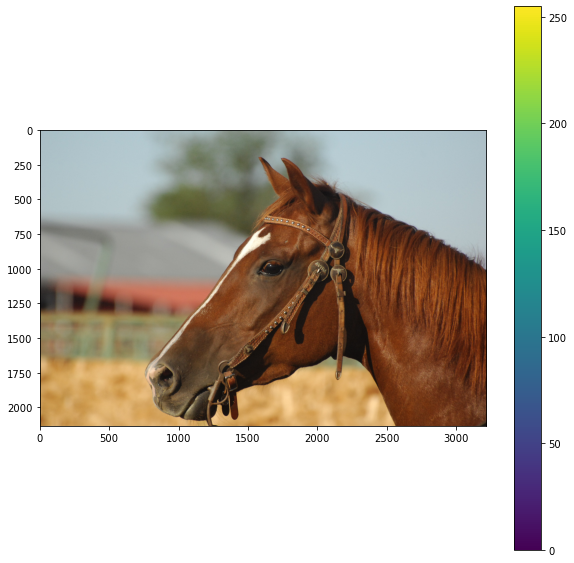

In [5]:
hourse = io.imread("./datasets/images/horse.jpg")
plot_image(hourse)

--------------------------------------------------
Type         :   <class 'numpy.ndarray'>
DType        :   float64
Shape        :   (213, 321, 3)
size         :   205119
High Pixel   :   0.9986715344997552
Lowes Pixel  :   0.03246406998627705
Aspect Ratio :   1.5070422535211268
--------------------------------------------------


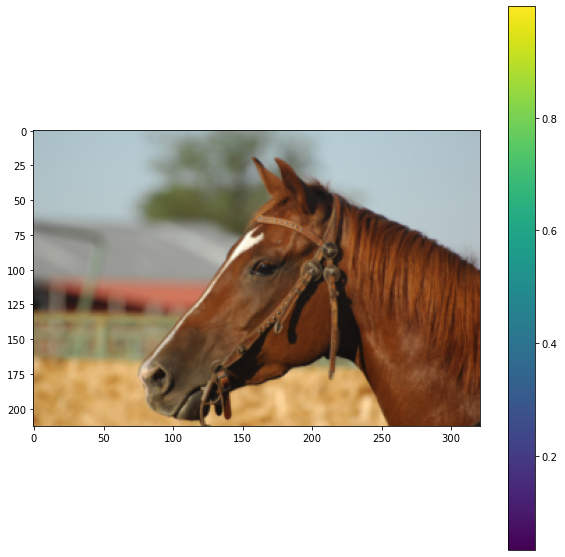

In [11]:
## image is very high defination 
## if we add noise in that then denoise 
## it it will take a lot of time
## so reduce the image size by 10 times

horse_resize = resize(hourse,(int(hourse.shape[0]/10),int(hourse.shape[1]/10)))
plot_image(horse_resize)

In [15]:
### Adding noise 

sigma = 0.155
noise_horse = random_noise(horse_resize,var = sigma**2)

--------------------------------------------------
Type         :   <class 'numpy.ndarray'>
DType        :   float64
Shape        :   (213, 321, 3)
size         :   205119
High Pixel   :   1.0
Lowes Pixel  :   0.0
Aspect Ratio :   1.5070422535211268
--------------------------------------------------


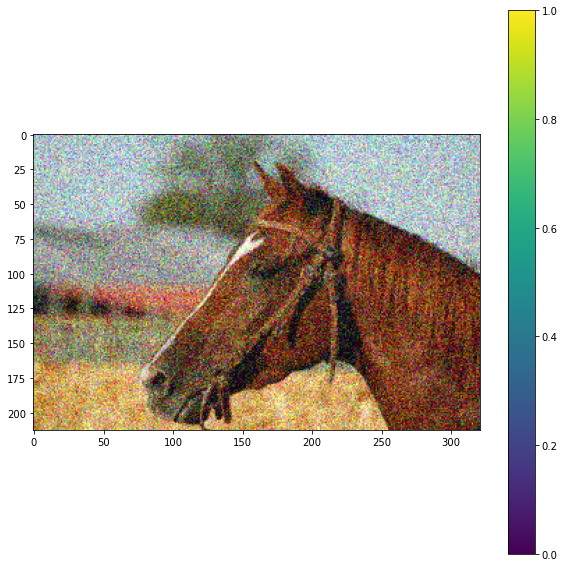

In [16]:
plot_image(noise_horse)

In [22]:
## REMOVE NOISE 
## can culate the sigma value that we added to make the image noisy
sigma_est = estimate_sigma(noise_horse,multichannel=True,average_sigmas=True)

In [23]:
sigma_est

0.1430341999806939

In [36]:
## DENOISE WITH denoise_tv_chambolle
denoise_image = denoise_tv_chambolle(noise_horse,weight=.1,multichannel=True)

--------------------------------------------------
Type         :   <class 'numpy.ndarray'>
DType        :   float64
Shape        :   (213, 321, 3)
size         :   205119
High Pixel   :   0.9224827335082032
Lowes Pixel  :   0.06926506589215656
Aspect Ratio :   1.5070422535211268
--------------------------------------------------


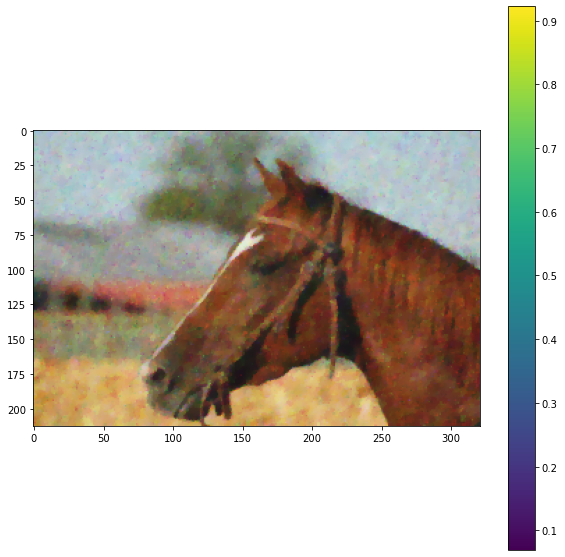

In [37]:
plot_image(denoise_image)

In [38]:
denoise_image2 = denoise_bilateral(noise_horse,multichannel=True)

--------------------------------------------------
Type         :   <class 'numpy.ndarray'>
DType        :   float64
Shape        :   (213, 321, 3)
size         :   205119
High Pixel   :   0.9818351891468821
Lowes Pixel  :   0.00021349080155239048
Aspect Ratio :   1.5070422535211268
--------------------------------------------------


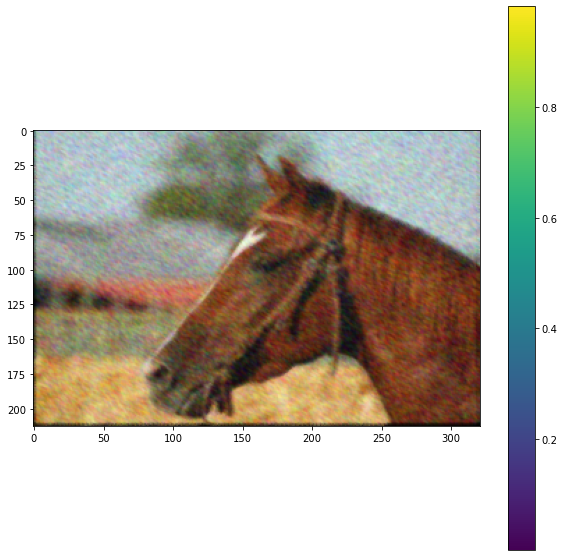

In [39]:
plot_image(denoise_image2)

In [40]:
denoise_image3 = denoise_wavelet(noise_horse,multichannel=True)

--------------------------------------------------
Type         :   <class 'numpy.ndarray'>
DType        :   float64
Shape        :   (213, 321, 3)
size         :   205119
High Pixel   :   0.9564876700248778
Lowes Pixel  :   0.024036322860399296
Aspect Ratio :   1.5070422535211268
--------------------------------------------------


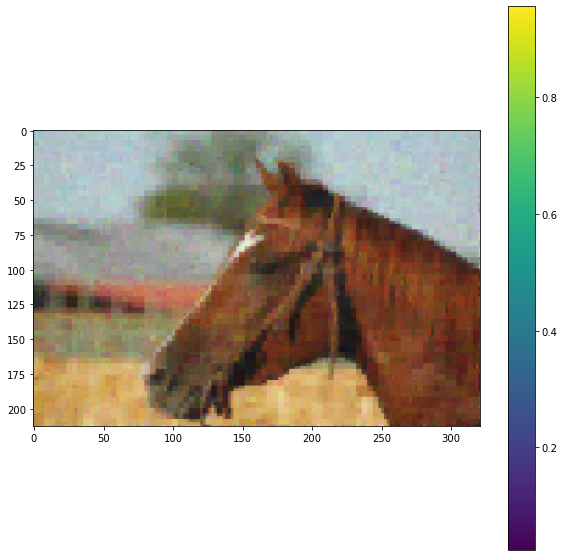

In [41]:
plot_image(denoise_image3)